## **Data Mining with Python**
### **Semana 10: Regresión Logística**
**Andrés C. Medina Sanhueza**

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

### **Introducción**

Los métodos de clasificación, permiten predecir variables cualitativas o categóricas. Tres de los métodos más usados son:
* `Regresión Logística`
* `Análisis Discriminante lineal y Cuadrático`
* `KNeighbors`

El método de regresión logística es el recomendado cuando se trabaja con una variable cualitativa con dos niveles, tanto con una variable como con múltiples variables o predictores. Al igual que en el caso de regresión, en los problemas de clasificación contamos con un set de datos de entrenamiento $(x_1, y_1),\cdots, (x_n, y_n)$ que usamos para generar un clasificador. 

Sea $Y$, una variable aleatoria binaria (dependiente), es decir:

$$
\begin{eqnarray*}
\hbox{Prob}(Y=y) = \pi^{y}(1-\pi)^{1-y}
\end{eqnarray*}
$$

Lo cual, se obtiene de combinar $\hbox{Prob}(Y=0) = (1-\pi)$ y $\hbox{Prob}(Y=1) = \pi$.

Ahora, si queremos obtener la función de verosimilitud para una observación i-ésima, y recordando que $Y$ es una variable aleatoria bernoulli, se tiene lo siguiente:

$$
\begin{eqnarray*}
\log(L(\pi;Y)) =  \log\left(\prod_{i=1}^{n}\hbox{Prob}(Y=y_i)\right) = y_i\log{(\pi_i)} + (1-y_i)\log{(1-\pi_i)}
\end{eqnarray*}
$$


Para comprender mejor la forma funcional de $\pi_i$, que puede ser cualquier función tal que $ 0 \leq \pi_i \leq 1$ y para generar el caso del Logit (o Probit), consideremos que $\pi_i = \pi(x_{i}^{\top} \beta)$

Notemos que, 

$$
\begin{eqnarray*}
\mathbb{E}(Y=y_i|X) = 0\cdot\hbox{Prob}(Y=0) + 1\cdot\hbox{Prob}(Y=1) = \pi
\end{eqnarray*}
$$

### **¿De donde viene la formulación funcional de $\pi(x)$?**

En términos de la teoría de la utilidad, asumiremos que las utilidades de cada persona están relacionadas con $X$ por

$$
\begin{eqnarray*}
U_{0}|X &=& \beta_{0}X + \epsilon_0 \\
U_{1}|X &=& \beta_{1}X + \epsilon_1
\end{eqnarray*}
$$

Donde $\beta_i X$ representa la utilidad observada de la opción $Y=i$ con $i=\{0,1\}$ y $\epsilon_i$ representa la fluctuación aleatoria en la utilidad de la opción. La regresión logística surge del supuesto de que $\epsilon_0$ y $\epsilon_1$ son independientes con distribución Gumbel. Cabe notar que esta distribución tiene función de densidad:

$$
\begin{eqnarray*}
f(\epsilon) = e^{-\epsilon}\exp{(-e)^{-\epsilon}}
\end{eqnarray*}
$$

Para probar que éste modelo de utilidad da lugar a una regresión logística, tenemos que: 

$$
\begin{eqnarray*}
\hbox{Prob}(Y=1|X=x) &=& \hbox{Prob}(U_1 > U_0 | X = x ) \\
&=&  \hbox{Prob}(\beta_{1}x + \epsilon_1 > \beta_{0}x + \epsilon_0) \\
&=&  \hbox{Prob}((\beta_{1}-\beta_{0})x  > \epsilon_0 - \epsilon_1) 
\end{eqnarray*}
$$

Es útil notar que la diferencia de variables aleatorias independientes de Gumbel distribuidas de manera idéntica sigue una distribución logística, por lo que:

$$
\begin{eqnarray*}
f(\Delta) = \frac{e^{-\Delta}}{(1 + e^{-\Delta})^2} \quad, \Delta =  \epsilon_1 - \epsilon_0
\end{eqnarray*}
$$

Por lo tanto:

$$
\begin{eqnarray*}
\hbox{Prob}(Y = 1 | X = x) &=& \hbox{Prob}((\beta_{1}-\beta_{0})x > -\Delta) \\
&=& \int_{-(\beta_{1}-\beta_{0})x}^{\infty}\frac{e^{-\Delta}}{(1 + e^{-\Delta})^2}d\Delta
\end{eqnarray*}
$$

Mediante sustitución simple, $t=1+e^{-\Delta}$, con $dt = -e^{-\Delta}$, se tiene lo siguiente:

$$
\begin{eqnarray*}
\hbox{Prob}(Y = 1 | X = x) &=& \int_{1}^{1+\exp{(\beta_{1}-\beta_{0})x}}t^{-2}dt \\
&=& t^{-1} \Big|_{1+\exp{((\beta_{1}-\beta_{0})x)}}^{1} \\
&=& 1 - \frac{1}{1+\exp{((\beta_1 - \beta_0)x)}} \\ 
&=& \frac{\exp{((\beta_1 - \beta_0)x)}}{1 + \exp{((\beta_1 - \beta_0)x)}}
\end{eqnarray*}
$$


Haciendo un reordenamiento de terminos, se tiene:
 
$$
\begin{eqnarray*}
\hbox{Prob}(Y = 1 | X=x) = \frac{e^x}{1 + e^x}, \quad \beta_1 - \beta_0 = 1
\end{eqnarray*}
$$

Ahora, volviendo al inicio, tenemos que:

$$
\begin{eqnarray*}
\hbox{Prob}(Y = 1|X_i) = \frac{\exp{(\beta_0 + \beta_1 X_i)}}{1 + \exp{(\beta_0 + \beta_1 X_i)}} = \pi_i
\end{eqnarray*}
$$


De acuerdo a la estimación por máxima verosimilitud, tenemos lo siguiente:

$$
\begin{eqnarray*}
l(w) = \sum_{i=1}^{n}y_{i}\log{(\sigma_i)} + (1-y_{i})\log{(1-\sigma_i)},\quad \sigma_i = \sigma(w^{\top}x_i) 
\end{eqnarray*}
$$

Notemos que este problema de optimización, no tiene solución cerrada, por lo que podemos resolverlo mediante gradiente, para lo cual, es necesario calcular el gradiente de $l(w)$ respecto a $w$:

$$
\begin{eqnarray*}
\nabla_{w}l(w) = \sum_{i=1}^{n}(y_i - \sigma_i)x_i
\end{eqnarray*}
$$

Lo cual, nos da una regla de ajuste de $\theta \rightarrow \theta - \eta\sum_{i=1}^{n}( \sigma_i - y_i)x_i$, o bien:

$$
\begin{eqnarray*}
\theta \rightarrow \theta  + \eta\sum_{i=1}^{n}(y_i - \sigma_i)x_i
\end{eqnarray*}
$$

---

### **Ejemplo 1** 

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Omite Warnings 
warnings.simplefilter("ignore")

# tamaño por defecto de las figuras
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 1.0, 'Datos')

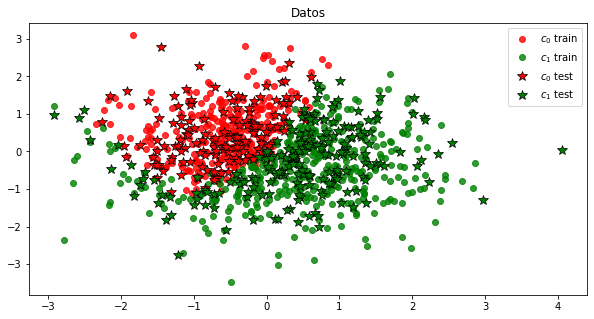

In [5]:
# cargar datos
data = np.loadtxt('datos_reg_log.txt', delimiter=',')

# dividimos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    data[:2, :].T, data[2, :].T, test_size=0.33)

# graficamos
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', alpha=0.8, label=r'$c_0$ train')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'go', alpha=0.8, label=r'$c_1$ train')
plt.plot(X_test[y_test==0, 0],
         X_test[y_test==0, 1],
         'r*',
         label=r'$c_0$ test',
         markeredgecolor='k',
         ms=10,
         markeredgewidth=0.7)
plt.plot(X_test[y_test==1, 0],
         X_test[y_test==1, 1],
         'g*',
         label=r'$c_1$ test',
         markeredgecolor='k',
         ms=10,
         markeredgewidth=0.7)
plt.legend()
plt.title('Datos')

**Definicion del modelo**

In [6]:
# Funcion Sigmoidea
def sig(w, x):
    """
    Retorna la sigmoidea de (w @ x)
    """
    # Agrego fila de unos
    x_tilda = np.c_[np.ones(x.shape[0]), x]
    a = x_tilda @ w
    return 1 / (1 + np.exp(-a))

# Funcion log-verosimilitud (NLL)
def rl_nll(w, x, y):
    """
    Log verosimilitud negativa del modelo de
    regresión logística.
    """
    # log verosimilitud negativa
    nll = -(y * np.log(sig(w, x)) + (1 - y) * np.log(1 - sig(w, x))).sum()
    return nll

# Derivada
def jac_nll(w, x, y, rho=0.1):
    """
    Jacobiano de la NLL.
    """
    x_tilda = np.c_[np.ones(x.shape[0]), x]
    return ((sig(w, x) - y) @ x_tilda)

In [7]:
# Optimizacion de (NLL)
from scipy.optimize import minimize as fmin

# condicion inicial
w0 = np.zeros(X_train.shape[1] + 1) + 1e-6

# argumentos
args = (X_train, y_train)

opt = fmin(
    rl_nll,                  # funcion objetivo
    w0,                      # condicion inicial
    args,                    # argumentos fijos funcion objetivo
    jac=jac_nll,             # gradientes
    method='BFGS',           # metodo
    tol=1e-8,                # tolerancia numerica
    options={'disp': True, 'maxiter': 8000}) # opciones extra

w_opt = opt.x
print('Pesos optimos', w_opt)
print('NLL', opt.fun)

Optimization terminated successfully.
         Current function value: 221.588241
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22
Pesos optimos [ 0.65779383  2.27381889 -2.35998406]
NLL 221.58824065780846


---

### **Ejemplo 2**

In [8]:
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt 
from plotnine import *
import numpy as np
import pandas as pd 
import seaborn as sns 
import warnings 

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set_style('dark')
sns.set(rc={'figure.figsize':(5.27,5.27)})

In [9]:
separation = 0
tempData = make_moons(n_samples = 1000, shuffle = True, noise = 0.3, random_state = 10)
tempData[0][tempData[1] == 1,1 ] = tempData[0][tempData[1] == 1,1] + separation
tempData[0][tempData[1] == 1,0 ] = tempData[0][tempData[1] == 1,0] + separation

X_train, X_test, y_train, y_test = train_test_split(tempData[0],tempData[1], test_size=0.33, random_state=42)

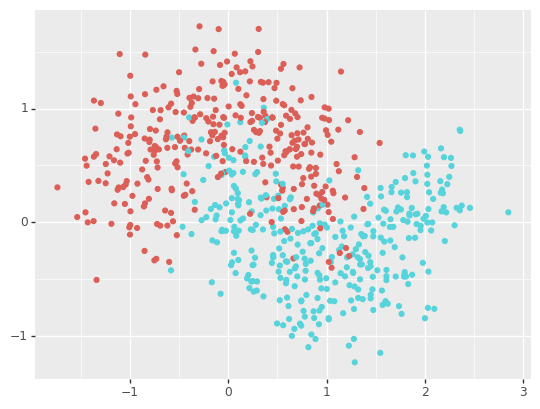

<ggplot: (8729867448811)>

In [10]:
(
    ggplot() + 
    aes(x=X_train[:,0], y=X_train[:,1], color = y_train.astype("str")) + 
    geom_point(show_legend=False)
)

---

### **Clase `LogisticRegression()`**

La clase `LogisticRegression()` del módulo `sklearn.linear_model` nos permite implementar un modelo de regresión logística. Sin embargo, no nos da los `p-values` de los coeficientes del modelo estimado.

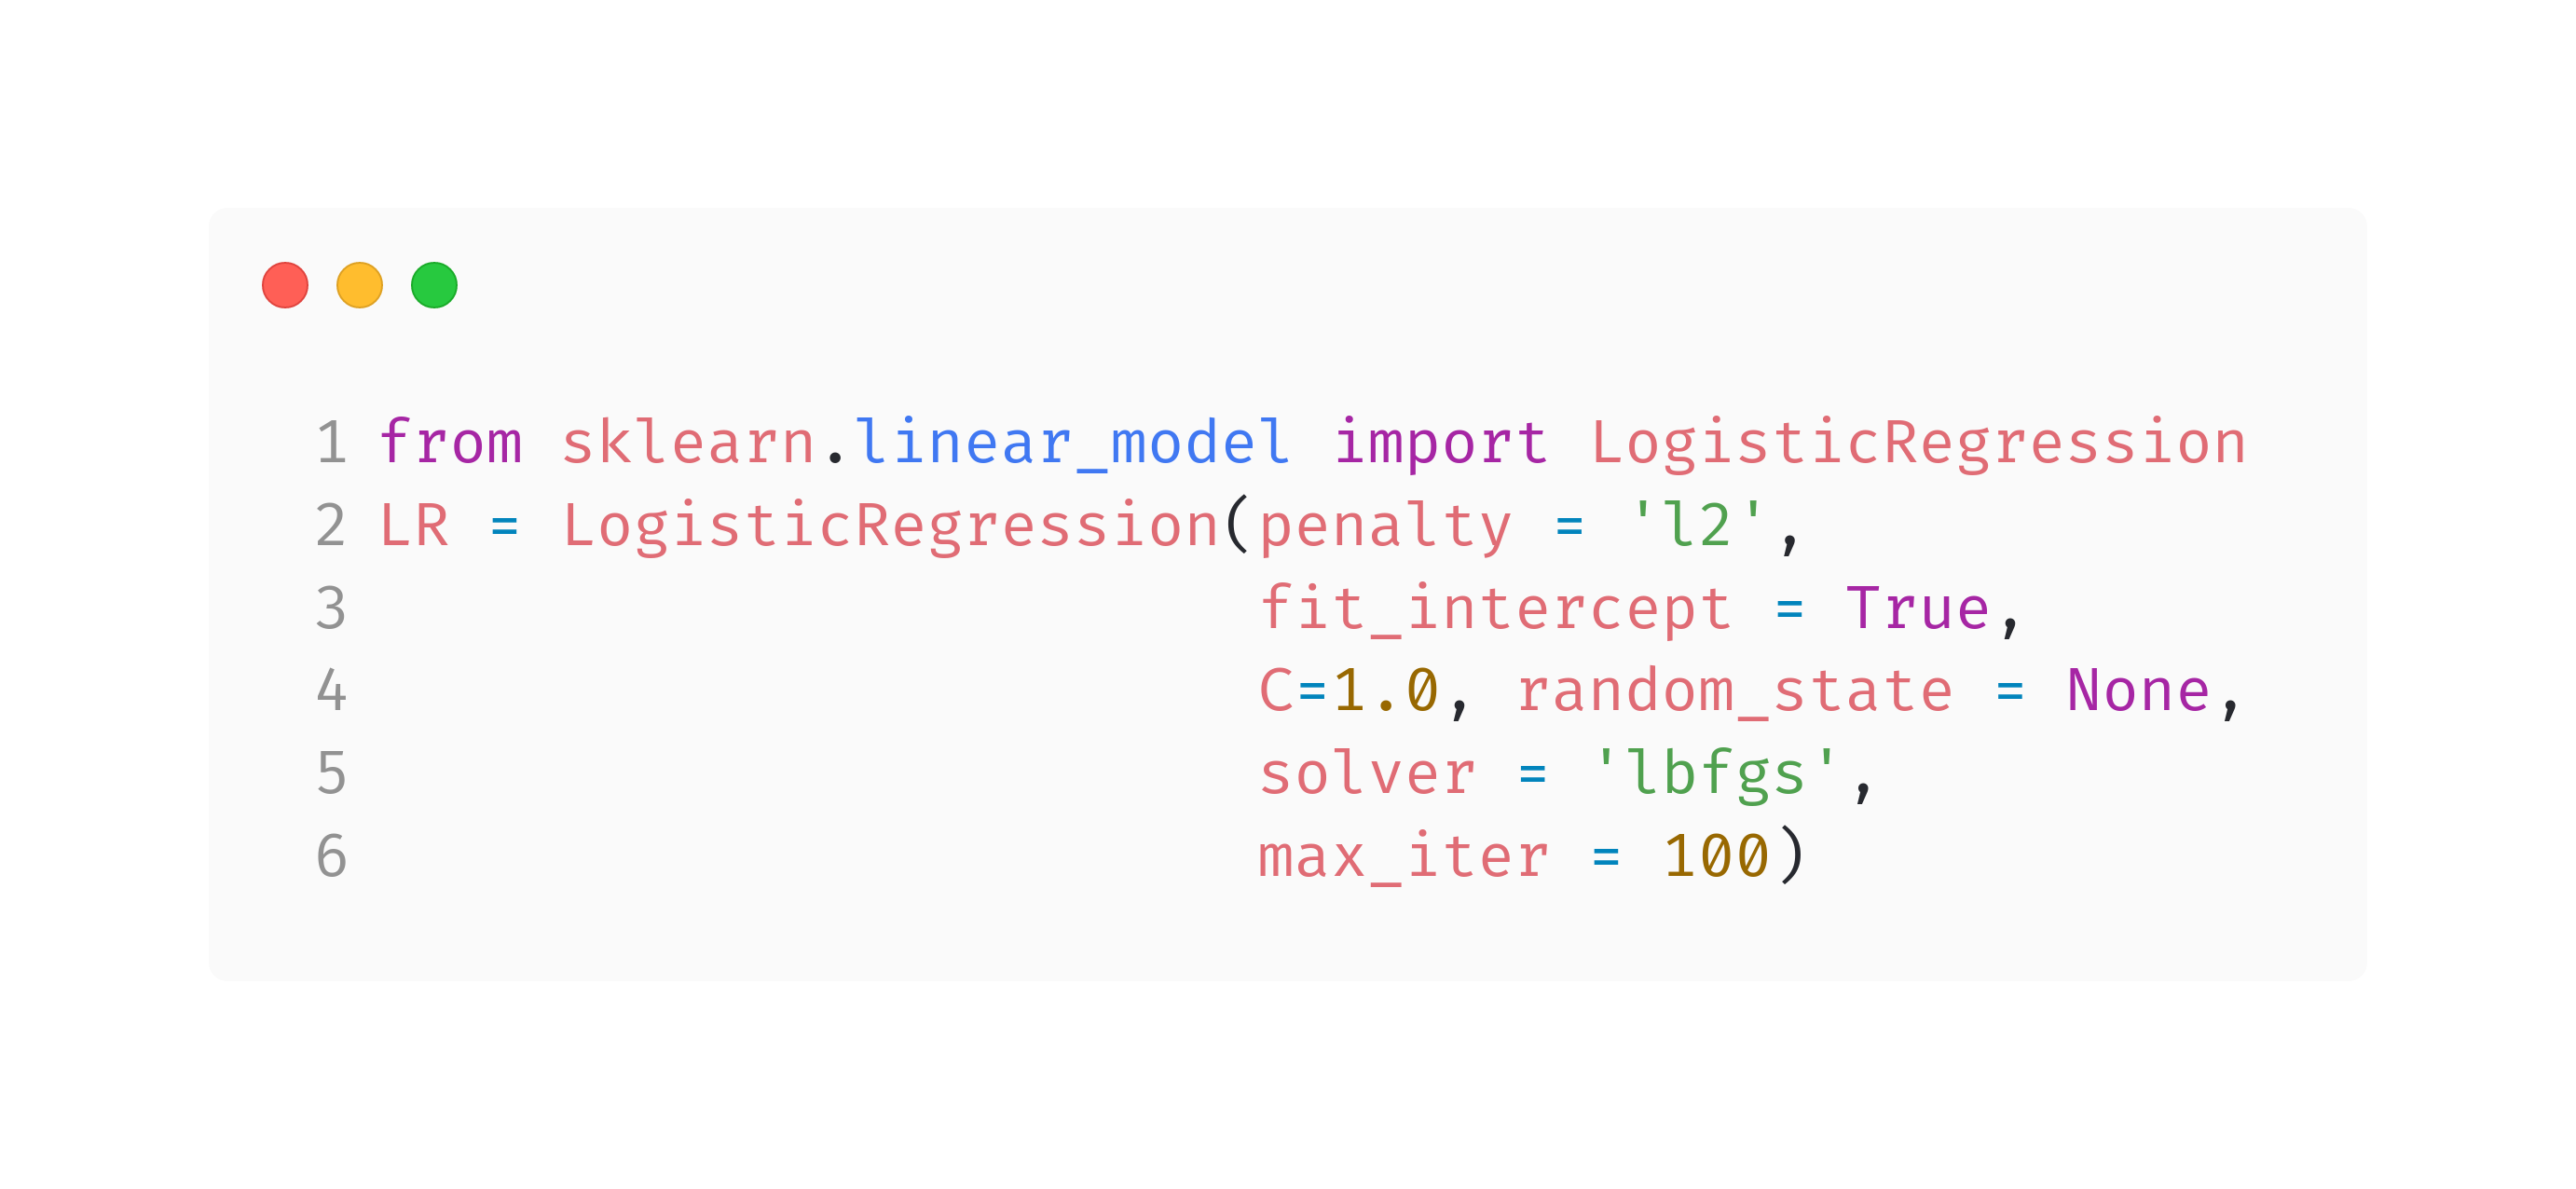

In [11]:
from IPython.display import Image
Image("figs/RL.png")

Los parámetros de la clase, son las siguientes:

* `penalty:` Penalización en el proceso de entrenamiento, puede ser $l_1$, $l_2$, ‘elasticnet’, ‘none’ (elasticNet implica l1 y l2)
* `fit_intercept:` Considera en forma automática una columna con valor constante para el modelo
* `C:` valor correspondiente al INVERSO del parámetro de penalización (C más pequeño implica mayor penalización).
* `random_state:` para replicar un experimento.
* `solver:` método para resolver el modelo, opciones: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ (hay restricciones según la penalización utilizada).
* `max_iter:` máximo número de iteraciones.

Los atributos de la clase, son los siguientes:
    
* `classes_:` las etiquetas de las clases.
* `coef_:` coeficientes aprendidos para las variables 
* `intercept_:` coeficiente del intercepto

Los métodos o funciones de la clase, son las siguientes:

* `fit(X, y):` "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* `predict(X):` predice las etiquetas para los puntos dados
* `predict_proba(X):` predice las probabilidades de las clases para los puntos dados
* `predict_log_proba(X):` predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)   

In [12]:
# Creando un modelo de regresión logística con las condiciones iniciales
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR = LR.fit(X_train,y_train)

# Aplicando el modelo a otros datos
resultado=LR.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

# Aplicando el modelo a otros datos
resultado=LR.predict_proba(X_test)
print("Resultado de la predicción:\n",resultado[:10])

# Analizando los parámetros aprendidos
print("\nAccuracy:",sum(LR.predict(X_test)==y_test)/len(y_test))

# Analizando los parámetros aprendidos
print("\nParametros:",LR.coef_,"\nIntercepto",LR.intercept_)

Resultado de la predicción:
 [0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1
 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1]
Resultado original:
 [0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 

---

### **Frontera de Decisión**

In [13]:
# Visualización de la frontera de decisión.
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tempData[0],tempData[1], test_size=0.33, random_state=42)
LR = LogisticRegression()
LR = LR.fit(X_train,y_train)

In [15]:
# Creando una grilla de evaluación
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest = pd.DataFrame(temp[0].flatten(),columns=["xx"])
dataTest.insert(1,"yy",temp[1].flatten())

In [16]:
# Prediciendo y graficando el output
probEstimada = LR.predict_proba(dataTest.iloc[:,0:2])
output =(((1-probEstimada[:,1])*255).astype("int"))

dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (output[i],0,255-output[i])

In [17]:
# Colores para los puntos originales
colorData = pd.DataFrame(list(map(str,tempData[1])),columns = ["colorClass"])
colorData.colorClass[colorData.colorClass == "0"]="Red"
colorData.colorClass[colorData.colorClass == "1"]="Blue"

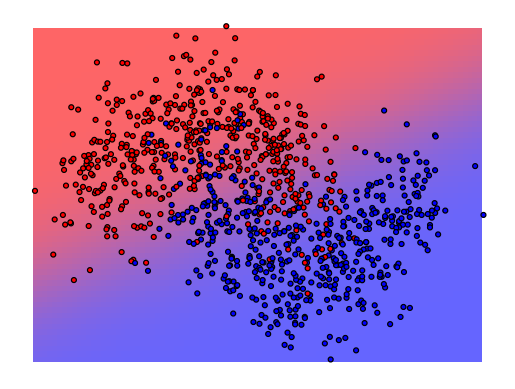

<ggplot: (8729855985369)>

In [18]:
(
    ggplot() + 
    theme_void() +
    geom_tile(aes(x = dataTest.xx,y = dataTest.yy),alpha = 0.6,show_legend = False,fill = dataTest.ClassOutput) + 
    geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)

In [19]:
print("\nParametros:",LR.coef_,"\nIntercepto",LR.intercept_)


Parametros: [[ 1.2341674  -3.18844397]] 
Intercepto [0.35587339]


---

### **Módulo `Statsmodels` - clase `Logit()`**

Lamentablemente, como `sklearn` no realiza el test de hipótesis de los parámetros de la regresión logística, veremos otro modulo, `Statsmodels`.

Dentro de `Statsmodels` se encuentra la clase `Logit()`, la cual permite generar un objeto para la regresión logística. Es decir, su comportamiento es bastante similar a los objetos de `sklearn`. Sin embargo, no incluye regularización l2 ni la inclusión de la constante (intercepto).

Logit nos permite implementar un modelo de regresión logística

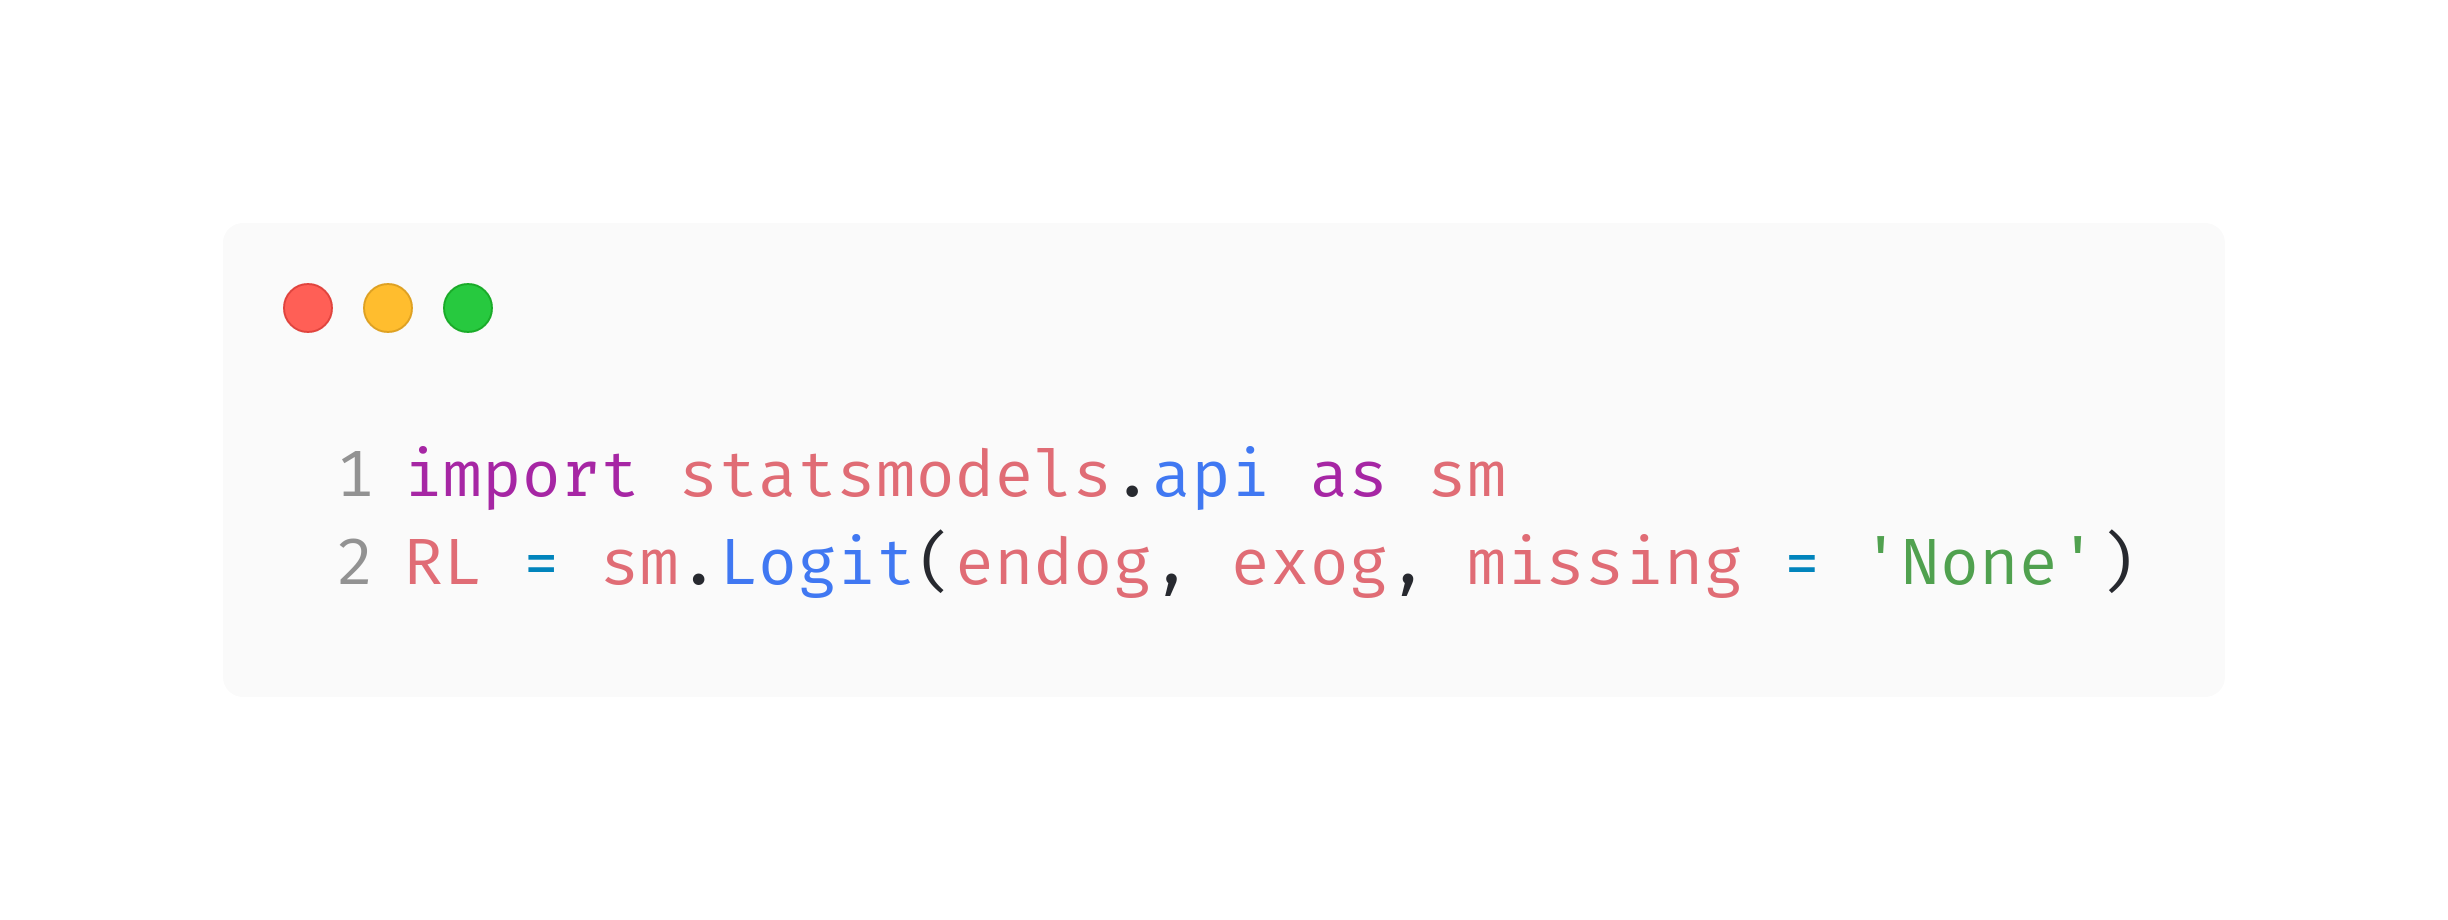

In [20]:
from IPython.display import Image
Image("figs/statsmodels.png")

Los parámetros de la clase, son las siguientes:

* `endog:` datos de la variable a clasificar.
* `exog:` datos de las variables explicativas.
* `missing:` ‘none’, ‘drop’, y ‘raise’. ‘none’ no se realiza chequeo de valores `NaN.` ‘drop’ bota cualquier punto con observación nan. ‘raise’ muestra un error si existe al menos una observación con valor nan

Los métodos o funciones de la clase, son las siguientes:

* `fit(start_params,method)`: entrena el modelo usando los parámetros dados (todos los parámetros son opcionales). start_params es un vector de ceros como solución inicial. method: 
* `fit_regularized([start_params, method, …])`: entrena el modelo usando los parámetros dados.
* `predict():` Predice la probabilidad de los puntos

In [21]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score)
import statsmodels.api as sm 

newData = np.insert(tempData[0], 0,values = 1, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(newData,tempData[1], test_size=0.33, random_state=42)

In [22]:
# Creando y entrenando el modelo
RL = sm.Logit(y_train,X_train)
RL = RL.fit()

# Aplicando el modelo a otros datos
probModelo = RL.predict(X_test)
print("Resultado de la predicción:\n",probModelo)
print("Resultado original:\n",y_test)

Optimization terminated successfully.
         Current function value: 0.343792
         Iterations 7
Resultado de la predicción:
 [0.04023418 0.99149262 0.90841775 0.98049297 0.62540327 0.02969296
 0.89400568 0.97494513 0.78377987 0.97490177 0.99144407 0.97373703
 0.98355814 0.06829739 0.29611335 0.4577565  0.99419105 0.01435686
 0.76302685 0.24620369 0.13868295 0.20571668 0.96588694 0.45167764
 0.78845113 0.04833158 0.92346974 0.94368082 0.8933451  0.97886391
 0.89575538 0.38519434 0.4660113  0.81363743 0.14379231 0.03116631
 0.07248601 0.3720575  0.30042122 0.87941015 0.18662349 0.94243253
 0.98398774 0.79511648 0.04608272 0.16492645 0.10770263 0.00375952
 0.93871279 0.96625022 0.63014506 0.67095667 0.17565355 0.43086438
 0.23984527 0.03633478 0.6534588  0.92094381 0.96929139 0.2400087
 0.91269297 0.07720526 0.19794511 0.93338132 0.15932994 0.85453079
 0.48365718 0.40532361 0.01626384 0.71926462 0.4118333  0.20052008
 0.81726395 0.93088599 0.98240399 0.92560527 0.45601782 0.92184362

In [23]:
prediccion = probModelo > 0.5

# matriz de confusion
cm = confusion_matrix(y_test, prediccion) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy del modelo
print('Test accuracy = ', accuracy_score(y_test, prediccion))

Confusion Matrix : 
 [[146  31]
 [ 25 128]]
Test accuracy =  0.8303030303030303


In [24]:
# Características del modelo
print(RL.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  670
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Oct 2022   Pseudo R-squ.:                  0.5036
Time:                        01:03:49   Log-Likelihood:                -230.34
converged:                       True   LL-Null:                       -463.98
Covariance Type:            nonrobust   LLR p-value:                3.407e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4187      0.156      2.676      0.007       0.112       0.725
x1             1.2646      0.146      8.687      0.000       0.979       1.550
x2            -3.4664      0.305    -11.384      0.0

* `Method()` MLE , Maximum Likelihood Estimation.
* `Log-Likelihood`: Logaritmo Natural del estimador maxima verosimilitud.
* `LL-Null`: El logaritmo natural del estimador maximo verosimil, considerando solo un intercepto.
* `Pseudo R-squ`: Ratio entre `Log-Likelihood` y `LL-Null`.
* `p>|z|:` p-value.
* `z`: Valor del estadistico de prueba.

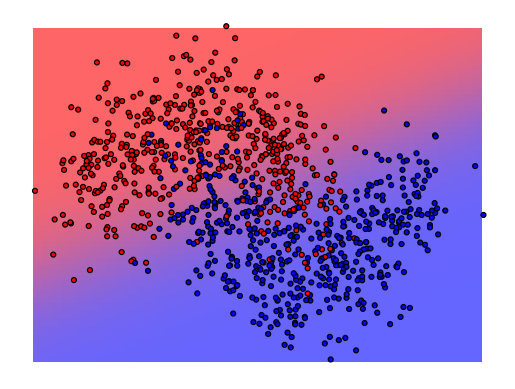

<ggplot: (8729855830860)>

In [25]:
x = np.arange(tempData[0][:,0].min(),tempData[0][:,0].max(), 0.05)
y = np.arange(tempData[0][:,1].min(),tempData[0][:,1].max(),0.05)
temp = np.meshgrid(x, y)
dataTest = pd.DataFrame(temp[0].flatten() ,columns=["xx"])
dataTest.insert(1, "yy", temp[1].flatten())
dataTest.insert(0, "base", 1)

# Prediciendo y graficando el output
probEstimada=RL.predict(dataTest.iloc[:,0:3])
output=(((1-probEstimada)*255).astype("int"))

dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (output[i],0,255-output[i])

# Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"

( 
    ggplot() + 
    theme_void() + 
    geom_tile(aes(x=dataTest.xx,y=dataTest.yy),alpha=0.6,show_legend=False,fill=dataTest.ClassOutput) + 
    geom_point(aes(x=tempData[0][:,0],y=tempData[0][:,1]),show_legend=False,color="black",fill=colorData)
)